<a href="https://colab.research.google.com/github/kujoki/Advanced-Machine-Learning-Masters-2022-/blob/main/war_of_the_worlds_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
sns.set(rc={'figure.figsize':(20,20)})

In [29]:
data = pd.read_csv('/content/sample_data/invasion.csv')

In [30]:
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [32]:
labelencoder = LabelEncoder()

In [33]:
data['class'].value_counts()

fighter      225
transport    205
cruiser       70
Name: class, dtype: int64



*   transport = 2

*   fighter = 1

*   cruiser = 0



In [12]:
data['class'] = labelencoder.fit_transform(data['class'])


In [13]:
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,2,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,2,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,2,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,1,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,1,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [14]:
data.columns

Index(['class', 'g_reflection', 'i_reflection', 'speed', 'brightness',
       'time_of_observance', 'volume'],
      dtype='object')

In [15]:
clf = RandomForestClassifier()

In [16]:
params = {'n_estimators': range(10,50,10), 
'max_depth': range(1,12,2),
'min_samples_leaf': range(1,7),
'min_samples_split': range(2,9,2)}

In [17]:
grid_search = GridSearchCV(clf, params, cv = 5)

In [18]:
grid_search.fit(data[['g_reflection', 'i_reflection', 'speed', 'brightness',
       'time_of_observance', 'volume']],data['class'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [19]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [20]:
best_model = grid_search.best_estimator_

In [21]:
test = pd.read_csv('/content/sample_data/operative_information.csv')

In [23]:
test.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [24]:
values, counts = np.unique(best_model.predict(test), return_counts=True)

In [25]:
values

array([0, 1, 2])

transport = 2
fighter = 1
cruiser = 0


In [26]:
counts

array([230, 675, 595])

In [34]:
best_model.feature_importances_

array([0.23011634, 0.07645563, 0.07434435, 0.12828553, 0.        ,
       0.49079815])

In [36]:
imp = pd.DataFrame(best_model.feature_importances_, index=test.columns, columns=['importance'])

In [37]:
imp

,importance
g_reflection,0.230116
i_reflection,0.076456
speed,0.074344
brightness,0.128286
time_of_observance,0.000000
volume,0.490798


In [39]:
space_can_be_a_dangerous_place = pd.read_csv('/content/sample_data/space_can_be_a_dangerous_place.csv')

In [40]:
space_can_be_a_dangerous_place.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [46]:
space_can_be_a_dangerous_place.columns

Index(['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near',
       'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous'],
      dtype='object')

In [42]:
space_can_be_a_dangerous_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   r                          100000 non-null  float64
 1   phi                        100000 non-null  float64
 2   peradventure_index         100000 non-null  float64
 3   dustiness                  100000 non-null  float64
 4   black_hole_is_near         100000 non-null  int64  
 5   buggers_were_noticed       100000 non-null  int64  
 6   nearby_system_has_planemo  100000 non-null  int64  
 7   dangerous                  100000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 6.1 MB


In [43]:
space_can_be_a_dangerous_place.dangerous.value_counts()

1    90202
0     9798
Name: dangerous, dtype: int64

In [50]:
params = {'n_estimators': range(10,50,10), 
'max_depth': range(1,12,2),
'min_samples_leaf': range(2,3),
'min_samples_split': range(8,10)}

In [53]:
clf = RandomForestClassifier()

In [57]:
grid_search = RandomizedSearchCV(clf, params, cv = 5)

In [58]:
grid_search.fit(space_can_be_a_dangerous_place[['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near',
       'buggers_were_noticed', 'nearby_system_has_planemo']], space_can_be_a_dangerous_place['dangerous'])

KeyboardInterrupt: ignored

In [60]:
space_can_be_a_dangerous_place.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


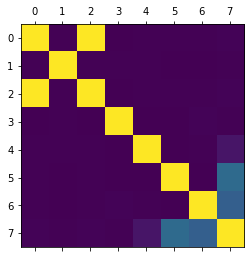

In [62]:
plt.matshow(space_can_be_a_dangerous_place.corr())


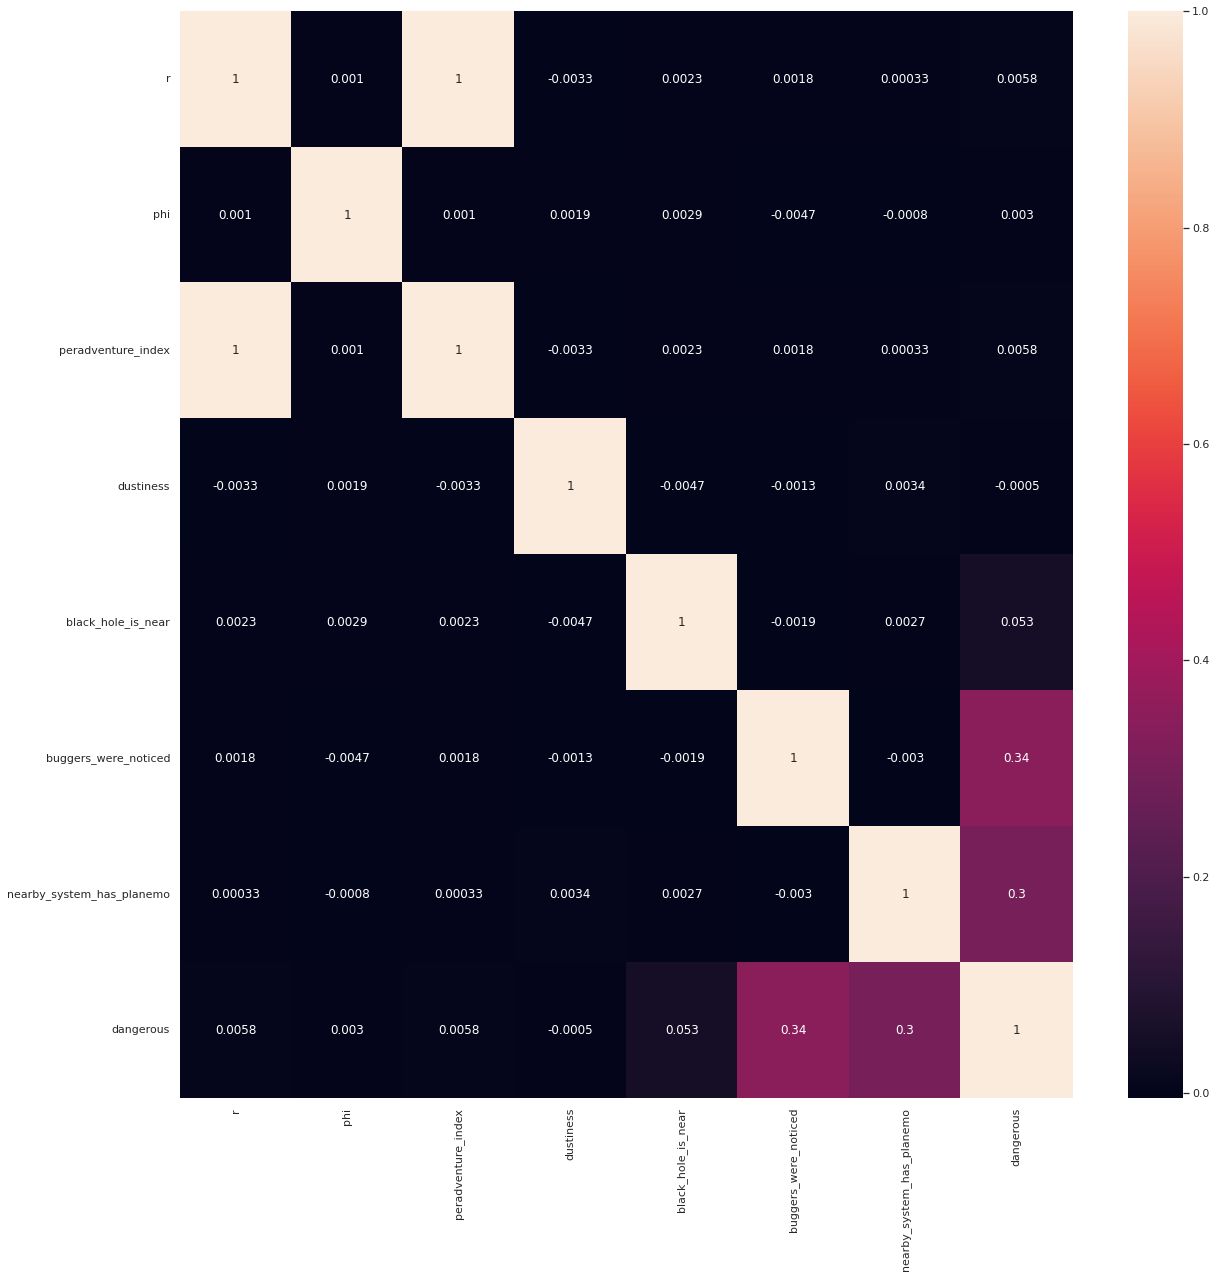

In [68]:
corrMatrix = space_can_be_a_dangerous_place.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()